In [21]:
# data analysis
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pyampute.exploration.md_patterns import mdPatterns
from pyampute.exploration.mcar_statistical_tests import MCARTest
import missingno as msno


# preprocessing
import sklearn.utils.validation
import sys
from scipy import stats
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, KBinsDiscretizer, Binarizer, PolynomialFeatures, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from feature_engine.outliers import Winsorizer
# from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.pipeline import Pipeline
from sklearn import set_config


# Linear Modeling
from sklearn.linear_model import RidgeClassifier, LogisticRegression, RidgeClassifierCV, LogisticRegressionCV, SGDClassifier, Perceptron, PassiveAggressiveClassifier

# Distance Modeling
from sklearn.svm import LinearSVC

# LDA QDA Modeling
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Decomposition
from sklearn.cross_decomposition import PLSCanonical

# Metrics
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay, classification_report, precision_recall_curve, PrecisionRecallDisplay, log_loss, brier_score_loss, roc_curve, roc_auc_score, RocCurveDisplay, det_curve, DetCurveDisplay, fbeta_score, class_likelihood_ratios, average_precision_score, matthews_corrcoef

## Imports

In [13]:
X_train = pd.read_csv(
    filepath_or_buffer = "../data/processed/X_train_linear.csv"
)
X_train.head(1)

,numeric__person_age,numeric__person_income,numeric__person_emp_length,numeric__loan_amnt,numeric__loan_int_rate,numeric__loan_percent_income,numeric__cb_person_cred_hist_length,categorical__person_home_ownership_MORTGAGE,categorical__person_home_ownership_OTHER,categorical__person_home_ownership_OWN,...,categorical__loan_grade_D categorical__loan_grade_E,categorical__loan_grade_D categorical__loan_grade_F,categorical__loan_grade_D categorical__loan_grade_G,categorical__loan_grade_D categorical__cb_person_default_on_file_True,categorical__loan_grade_E categorical__loan_grade_F,categorical__loan_grade_E categorical__loan_grade_G,categorical__loan_grade_E categorical__cb_person_default_on_file_True,categorical__loan_grade_F categorical__loan_grade_G,categorical__loan_grade_F categorical__cb_person_default_on_file_True,categorical__loan_grade_G categorical__cb_person_default_on_file_True
0,0.401371,-0.711319,0.308085,0.437175,-0.033241,1.134027,1.212243,1.19222,-0.055634,-0.294188,...,0.0,0.0,0.0,-0.246752,0.0,0.0,-0.119614,0.0,-0.05986,-0.035776


In [14]:
X_test = pd.read_csv(
    filepath_or_buffer = "../data/processed/X_test_linear.csv"
)
X_test.head(1)

,numeric__person_age,numeric__person_income,numeric__person_emp_length,numeric__loan_amnt,numeric__loan_int_rate,numeric__loan_percent_income,numeric__cb_person_cred_hist_length,categorical__person_home_ownership_MORTGAGE,categorical__person_home_ownership_OTHER,categorical__person_home_ownership_OWN,...,categorical__loan_grade_D categorical__loan_grade_E,categorical__loan_grade_D categorical__loan_grade_F,categorical__loan_grade_D categorical__loan_grade_G,categorical__loan_grade_D categorical__cb_person_default_on_file_True,categorical__loan_grade_E categorical__loan_grade_F,categorical__loan_grade_E categorical__loan_grade_G,categorical__loan_grade_E categorical__cb_person_default_on_file_True,categorical__loan_grade_F categorical__loan_grade_G,categorical__loan_grade_F categorical__cb_person_default_on_file_True,categorical__loan_grade_G categorical__cb_person_default_on_file_True
0,1.472769,0.188676,1.134904,-0.739835,-0.982623,-0.915386,1.455922,1.19222,-0.055634,-0.294188,...,0.0,0.0,0.0,-0.246752,0.0,0.0,-0.119614,0.0,-0.05986,-0.035776


In [15]:
y_train = pd.read_csv(
    filepath_or_buffer = "../data/interim/y_train.csv"
)
y_train.head(1)
y_train = y_train.values

In [16]:
y_test = pd.read_csv(
    filepath_or_buffer = "../data/interim/y_test.csv"
)
y_test.head(1)
y_test = y_test.values

* True Negative - Predict they dont default, they actually dont default
* False Negative - Predict they dont default, they actually default (give someone a loan who is going to default) (result: direct loss)
* True Postiive - predict they default - they actually default
* False Positive - predict they default - they actually dont default (refuse to give a loan to someone whod pay it back + interest) (result: loss of opportunity)

## Ridge Classification

In [214]:
rc = RidgeClassifier(
    random_state=42
    )

In [215]:
rc.fit(X_train, y_train)

c:\Users\billy\anaconda3\envs\credit_risk_modeling\Lib\site-packages\sklearn\linear_model\_ridge.py:1332: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,"alpha alpha: float, default=1.0Regularization strength; must be a positive float. Regularizationimproves the conditioning of the problem and reduces the variance ofthe estimates. Larger values specify stronger regularization.Alpha corresponds to ``1 / (2C)`` in other linear models such as:class:`~sklearn.linear_model.LogisticRegression` or:class:`~sklearn.svm.LinearSVC`.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If set to false, nointercept will be used in calculations (e.g. data is expected to bealready centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.The default value is determined by scipy.sparse.linalg.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard scipy.linalg.solve function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its unbiased and more flexible version named SAGA. Both methods use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing. .. versionadded:: 0.17 Stochastic Average Gradient descent solver. .. versionadded:: 0.19 SAGA solver.- 'lbfgs' uses L-BFGS-B algorithm implemented in `scipy.optimize.minimize`. It can be used only when `positive` is True.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details.",42


In [216]:
y_pred = rc.predict(X_test)

In [217]:
decision_scores = rc.decision_function(X_test)

## Classifier Metrics

#### ROC

In [99]:
fpr, tpr, thresholds = roc_curve(
    y_true = y_test,
    y_score = decision_scores
)

In [100]:
roc_auc = roc_auc_score(
    y_true = y_test,
    y_score = decision_scores
)
print(f"The ROC AUC score is {roc_auc:.4f}")

The ROC AUC score is 0.8916


Text(0.5, 1.0, 'ROC Curve')

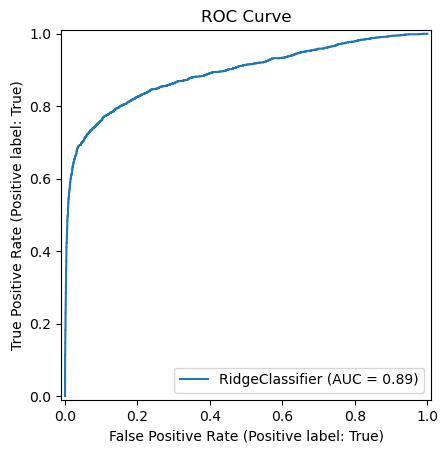

In [101]:
RocCurveDisplay.from_estimator(
    estimator = rc,
    X = X_test,
    y = y_test
)
plt.title('ROC Curve')

In [221]:
models = [LogisticRegression(), RidgeClassifier()]

#### Precision/Recall

In [102]:
print(classification_report(
    y_true = y_test,
    y_pred = y_pred
))

              precision    recall  f1-score   support

       False       0.91      0.98      0.94      7605
        True       0.89      0.64      0.74      2118

    accuracy                           0.90      9723
   macro avg       0.90      0.81      0.84      9723
weighted avg       0.90      0.90      0.90      9723



In [137]:
pr_auc = average_precision_score(
    y_true = y_test,
    y_score = decision_scores
)

In [130]:
precision, recall, thresholds = precision_recall_curve(
    y_true = y_test,
    y_score = decision_scores
)

Text(0.5, 1.0, 'Precision Recall Curve (PR-AUC = 0.8164)')

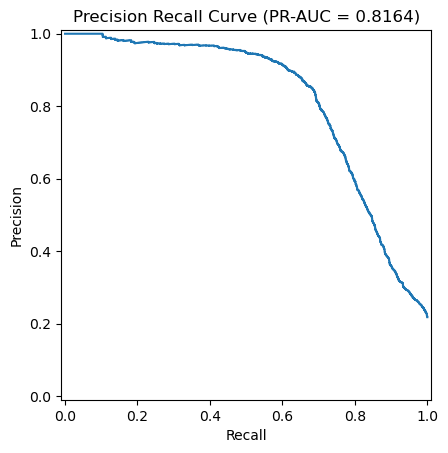

In [139]:
PrecisionRecallDisplay(
    precision = precision,
    recall = recall,
).plot()
plt.title(f"Precision Recall Curve (PR-AUC = {pr_auc:.4f})")

### Log Loss

In [108]:
log_loss(
    y_true = y_test,
    y_pred = y_pred
)

3.4697994006184976

### Brier Score Loss

In [111]:
brier_score_loss(
    y_true = y_test,
    y_proba = y_pred
)

0.09626658438753471

### Confusion Matrix

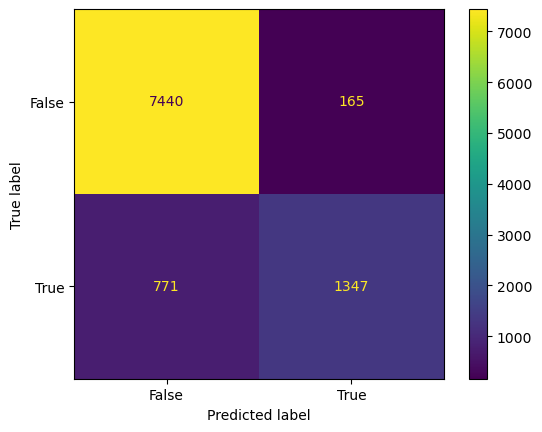

In [105]:
ConfusionMatrixDisplay.from_estimator(
    estimator = rc,
    X = X_test,
    y = y_test
)

#### F Beta Score

In [127]:
fbeta_score(
    y_true = y_test,
    y_pred = y_pred,
    beta=2
)

0.6745793269230769

In [118]:
balanced_accuracy_score(
    y_true = y_test,
    y_pred = y_pred
)

0.8071405423224991

0.6996902269559602

In [120]:
class_likelihood_ratios(
    y_true = y_test,
    y_pred = y_pred
)

(29.31277362863765, 0.37209574613908436)

### DET Curve

In [80]:
fpr, fnr, thresholds = det_curve(
    y_true = y_test,
    y_score = decision_scores
)

Text(0.5, 1.0, 'DET Curve')

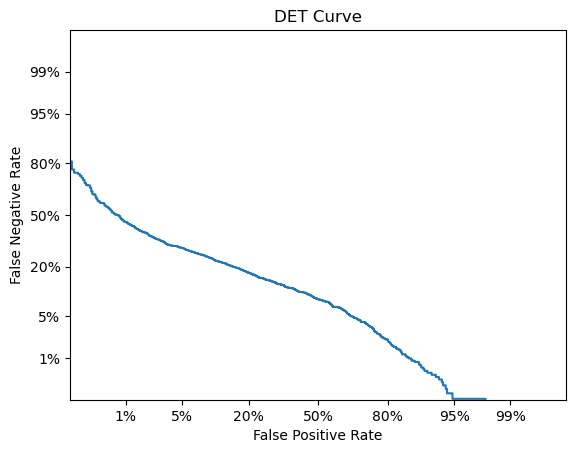

In [85]:
DetCurveDisplay(
    fpr=fpr,
    fnr=fnr
).plot()
plt.title("DET Curve")

## Compare Models

In [ ]:
def comparing_models(models, X_train, y_train, X_test, y_test):
    results = []

    for est in models:
        model_name = est.__class__.__name__

        try:
            est.fit(X_train, y_train)
            y_pred = est.predict(X_test)

            # Default values
            roc_auc = np.nan
            pr_auc = np.nan
            ll = np.nan
            bcl = np.nan

            # Use predict_proba if available
            if hasattr(est, "predict_proba"):
                pos_prob = est.predict_proba(X_test)[:, 1]
                roc_auc = roc_auc_score(y_test, pos_prob)
                pr_auc = average_precision_score(y_test, pos_prob)
                ll = log_loss(y_test, pos_prob)
                bcl = brier_score_loss(y_test, pos_prob)

            # Otherwise use decision_function
            elif hasattr(est, "decision_function"):
                scores = est.decision_function(X_test)
                roc_auc = roc_auc_score(y_test, scores)
                pr_auc = average_precision_score(y_test, scores)

            
            mc = matthews_corrcoef(y_test, y_pred)

            results.append({
                "model": model_name,
                "roc_auc": roc_auc,
                "pr_auc": pr_auc,
                "log_loss": ll,
                "brier_score": bcl,
                "matthews_corrcoef": mc
            })

        except Exception as e:
            results.append({
                "model": model_name,
                "roc_auc": np.nan,
                "pr_auc": np.nan,
                "log_loss": np.nan,
                "brier_score": np.nan,
                "matthews_corrcoef": np.nan,
                "error": str(e)
            })

    return pd.DataFrame(results)


In [ ]:
models = [LogisticRegressionCV(penalty='l1', solver='saga'),
          LogisticRegressionCV(penalty='l2', solver='sag'),
          LogisticRegressionCV(penalty='elasticnet', solver='saga')
          RidgeClassifierCV(alphas=np.logspace(-6, 6, 13)),
          SGDClassifier(loss='log_loss'), # Logistic Regression via SGD
          SGDClassifier(loss='hinge'), # linear SVM via SGD
          Perceptron(),
          PassiveAggressiveClassifier(),
          LinearDiscriminantAnalysis(),
          LinearSVC()]

In [23]:
comparing_models(models, X_train, y_train, X_test, y_test)

c:\Users\billy\anaconda3\envs\credit_risk_modeling\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\billy\anaconda3\envs\credit_risk_modeling\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\billy\anaconda3\envs\credit_risk_modeling\Lib\site-packages\sklearn\linear_model\_rid

,roc_auc,pr_auc,Log_loss,Brier_Score_Loss,Matthews Correlation Coefficient,model_used
0,0.903291,0.827796,3.377123,0.078317,0.709374,LogisticRegression(random_state=42)
0,0.891637,0.816381,NaN,NaN,0.699690,RidgeClassifier(random_state=42)
0,0.891637,0.816381,NaN,NaN,0.699690,"RidgeClassifierCV(alphas=array([1.e-06, 1.e-05..."
0,0.881602,0.786776,NaN,NaN,0.668371,SGDClassifier()
0,0.849885,0.726582,NaN,NaN,0.539743,Perceptron()
0,0.852069,0.697208,NaN,NaN,0.530154,PassiveAggressiveClassifier()
0,0.891981,0.816507,3.488335,0.080379,0.699812,LinearDiscriminantAnalysis()
0,0.856036,0.660221,5.638424,0.155831,0.479314,QuadraticDiscriminantAnalysis(reg_param=0.1)
0,0.899084,0.820990,NaN,NaN,0.707575,LinearSVC()
